In [2]:
import os
import dill as pickle

In [3]:
os.getcwd()

'C:\\Users\\Calum\\Documents\\Coding'

In [7]:
# picklefile is the location of the pickled file generated using preader 
cwd = os.getcwd()
picklefile = 'C:\\Users\\Calum\\Documents\\Coding\\Python\\PDielec_Dev\\PDielec\\testfiles\\casteptest.pickle'

# This opens the pickled file generated by preader, 
# should read in multiple files if preader prcoessed multiple output files at once 
readers = []   
with open(picklefile,'rb') as f:
     readers = pickle.load(f)


In [8]:
x

NameError: name 'x' is not defined

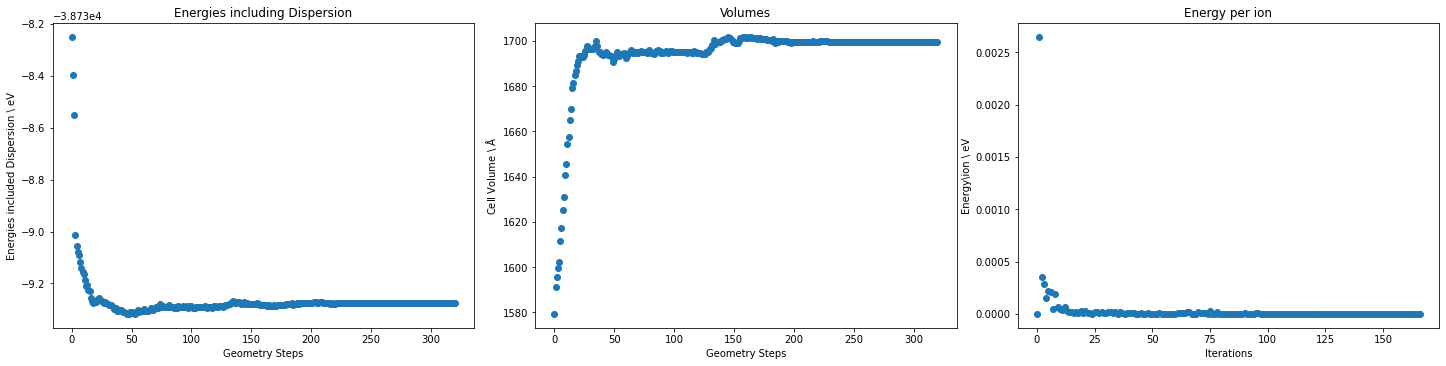

In [9]:
#Energy and Volume Plots

import matplotlib.pyplot as plt
    

steps = list(range(0, readers.geomsteps))

OutputReader = str(type(readers).__name__)
castep = "Castep"
vasp = "Vasp"

if castep in OutputReader:

    fig = plt.figure(figsize=(20, 5))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    iterations = list(range(0, len(readers.fmax)))
    
    if not readers.energiesDFT_disp:
        ax1.scatter(steps, readers.energiesDFT)
        ax1.title.set_text('Energies')
        ax1.set_xlabel('Geometry Steps')
        ax1.set_ylabel('Energies \ eV') 

    else:
        ax1.scatter(steps, readers.energiesDFT_disp)
        ax1.set_xlabel('Geometry Steps')
        ax1.set_ylabel('Energies included Dispersion \ eV')
        ax1.title.set_text('Energies including Dispersion')
    
    ax2.scatter(steps, readers.volumes[0:-2])
    ax2.title.set_text('Volumes')
    ax2.set_xlabel('Geometry Steps')
    ax2.set_ylabel('Cell Volume \ $\mathregular{\AA}$')
    ax3.scatter(iterations, readers.de_ion)
    ax3.title.set_text('Energy per ion')
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Energy\ion \ eV')

    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()   
    
else:
    print ("No Reader found!")

In [10]:
counter1 = 1
xaxis = []
while counter1 <= 321:
    xaxis.append(counter1)
    counter1 += 1
    
print(len(xaxis))
print(xaxis)
print(readers.volumes)

321
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

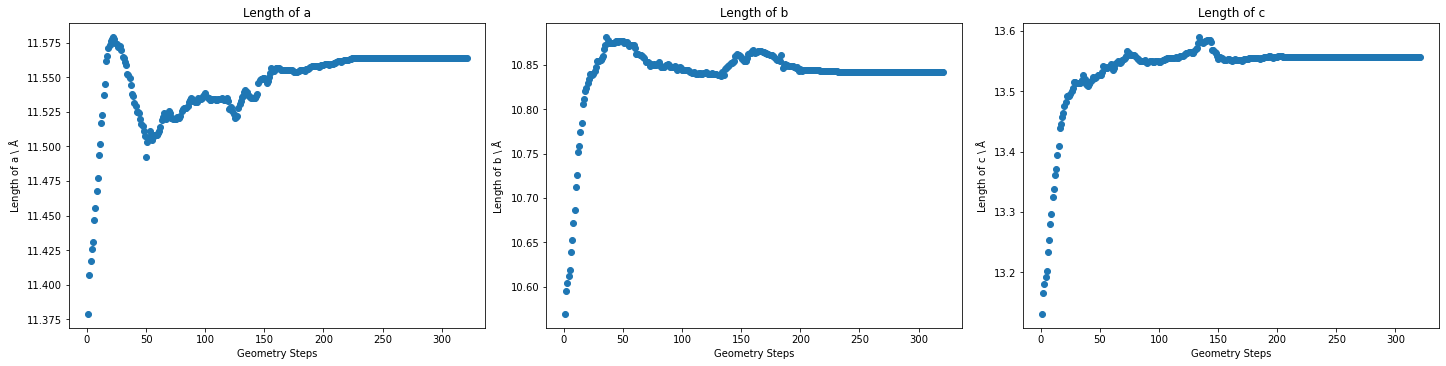

In [11]:
# Unit cell length plots
import PDielec.UnitCell as UnitCell

counter1 = 1
x_axis = []
while counter1 <= 321:
    x_axis.append(counter1)
    counter1 += 1

# This uses UnitCell tool in python to convert unit cells to abc 
alengths = []
blengths = []
clengths = []
alphas = []
betas = []
gammas = []


for i in range(0, len(readers.unit_cells)): 
    unitCell = readers.unit_cells[i]
    a,b,c,alpha,beta,gamma = unitCell.convert_unitcell_to_abc()
    #alengths.append = a
    alengths.append(a)
    blengths.append(b)
    clengths.append(c)
    alphas.append(alpha)
    betas.append(beta)
    gammas.append(gamma)
    
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

if castep in OutputReader:
    
    alengths = alengths[0:-2]
    blengths = blengths[0:-2]
    clengths = clengths[0:-2]
    
ax1.scatter(x_axis, alengths)
ax1.title.set_text('Length of a')
ax1.set_xlabel('Geometry Steps')
ax1.set_ylabel('Length of a \ $\mathregular{\AA}$')
ax2.scatter(x_axis, blengths)
ax2.title.set_text('Length of b')
ax2.set_xlabel('Geometry Steps')
ax2.set_ylabel('Length of b \ $\mathregular{\AA}$')
ax3.scatter(x_axis, clengths)
ax3.title.set_text('Length of c')
ax3.set_xlabel('Geometry Steps')
ax3.set_ylabel('Length of c \ $\mathregular{\AA}$')

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()  

In [12]:
print(len(alengths))

321


In [13]:
# Unit cell angle plots
import numpy as np

if castep in OutputReader:
    
    alphas = alphas[0:-2]
    betas = betas[0:-2]
    gammas = gammas[0:-2]
    
if np.var(alphas) + np.var(betas) + np.var(gammas) == 0:
    print('All Angles Fixed By Symmetry')

    
else:
    fig = plt.figure(figsize=(20, 5))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    if np.var(alphas) == 0:
        ax1.scatter(x_axis, alphas)
        ax1.title.set_text('Angle of ' r'$\alpha$')
        ax1.set_xlabel('Geometry Steps')
        ax1.set_ylabel('Angle of ' r'$\alpha$' ' \ Degrees')
    else:
        fig.delaxes(ax1)
    if np.var(betas) == 0:    
        ax2.scatter(x_axis, betas)
        ax2.title.set_text('Angle of ' r'$\beta$')
        ax2.set_xlabel('Geometry Steps')
        ax2.set_ylabel('Angle of ' r'$\beta$' ' \ Degrees')
    else:
        fig.delaxes(ax2)
    
    if np.var(gammas) == 0:
        ax3.scatter(x_axis, gammas)
        ax3.title.set_text('Angle of ' r'$\gamma$')
        ax3.set_xlabel('Geometry Steps')
        ax3.set_ylabel('Angle of ' r'$\gamma$' ' \ Degrees')
    else:
        fig.delaxes(ax3)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()





All Angles Fixed By Symmetry


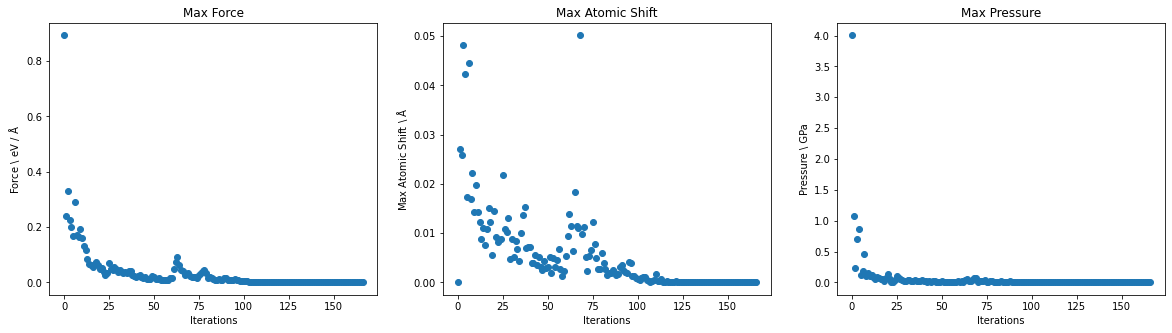

In [17]:
#Other Convergence Criteria

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

if castep in OutputReader:
    ax1.scatter(iterations, readers.fmax)
    ax1.title.set_text('Max Force')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Force \ eV / $\mathregular{\AA}$')
    ax2.scatter(iterations, readers.dr_max)
    ax2.title.set_text('Max Atomic Shift')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Max Atomic Shift \ $\mathregular{\AA}$')
    ax3.scatter(iterations, readers.smax)
    ax3.title.set_text('Max Pressure')
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Pressure \ GPa')
    